# Analiza lokalov študentske prehrane

Kakor večina študentov tudi sama z veseljem koristim študentske bone, ki v nekaterih lokalih po Sloveniji nudijo pestro ponudbo prehrane, dostopnejše študentski denarnici. Koliko pravzaprav je teh lokalov? Kako so razporejeni po Sloveniji? Kje se gibljejo cene? Kaj, če si nekdo želi jesti vegetariansko ali za vikend ali če potrebuje dostop za invalide? Jeseni 2018 sem zbrala podatke iz spletne strani [Študentska prehrana](https://www.studentska-prehrana.si/sl/restaurant). Sledijo tabearični in grafični povzetki analize. 

In [107]:
import pandas as pd
lokali = pd.read_csv('studentska_prehrana.csv', index_col='id')
lastnosti = pd.read_csv('lastnosti_ponudbe.csv', index_col='id')
pd.options.display.max_rows = 15

In [108]:
%matplotlib inline

In [109]:
lokali.sort_values(['doplacilo', 'ocena'], ascending=[True, False])

,cena,doplacilo,mesto,ocena,ime,naslov
id,,,,,,
2724,2.63,0.00,LJUBLJANA,5,FAJN FUUD PIZZA,Poljanska cesta 22
2702,2.63,0.00,MARIBOR,5,FRESH 4 LIFE VETRINJSKA,Vetrinjska ulica 9
2650,2.63,0.00,MARIBOR,5,GOSPOSVETSKA,Gosposvetska cesta 83
2347,2.63,0.00,MARIBOR,5,KAVARNA IN SENDVIČARNA FERI,Smetanova ulica 17
2731,2.63,0.00,LJUBLJANA,5,MAFIJA,Jadranska 21
1984,2.63,0.00,VELENJE,5,PEK MATJAŽ TOMŠIČEVA,Tomšičeva cesta 15
1335,2.63,0.00,LJUBLJANA,5,PIZZERIA ŠESTINKA,Miklošičeva cesta 22
...,...,...,...,...,...,...
1432,7.00,4.37,JESENICE,2,EJGA - RESTAVRACIJA - KAVARNA - PUB - CATERING,Cesta maršala Tita 27


Vseh lokalov študentske prhrane v Sloveniji je 490. Za statistično analizo nekaterih podatkov iz zgornje tabele zajetih podatkov ne bomo potrebovali. Eden od podatkov o ceni in doplačilu je odveč, saj je razlika med njima vedno 2.63 €, kolikor znaša subvencija. Obdelovali bomo doplačilo, saj je le-to za študente bolj pomembno. Ne bomo delali z imeni lokalov, ampak jih bomo identificirali po njihovih id številkah. Pri obravnavi lokacije lokalov pa bomo zanemarili točen naslov in se zadovoljili s podatkom o mestu, v katerem leži.

## Doplačila, ocene in njihova povezanost

In [110]:
lokali_po_oceni = lokali.groupby('ocena')

In [111]:
lokali_po_oceni.size()

ocena
0    102
1      3
2     12
3     33
4    196
5    144
dtype: int64

[Text(0, 0.5, 'Število'), Text(0.5, 0, 'Ocena')]

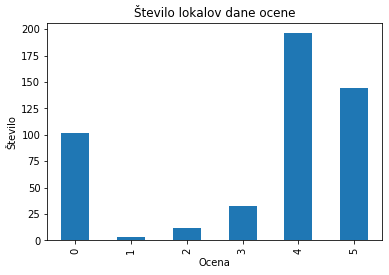

In [112]:
lokali_po_oceni.size().plot.bar(title='Število lokalov dane ocene').set(xlabel='Ocena', ylabel='Število')

Največ lokalov se lahko pohvali z oceno 4, tudi z oceno 5 jih je kar precej glede na ocene 1, 2 in 3. Opazimo, da razmeroma veliko število lokalov še ni bilo ocenjenih in jim torej pripada ocena 0. Na tem mestu je morda potreben komentar, da podatki, ki so na voljo, ne podajajo nujno najboljše slike popularnosti posameznih lokalov, to bi dobili, če bi poleg ocen lokalov pozali tudi njihovo dejansko obiskanost. Zadovoljili se bomo z ocenami, saj je to največ, kar lahko brez posebnih pooblastil izvemo o priljubljenosti lokalov. 

In [113]:
lokali_po_oceni.doplacilo.mean()

ocena
0    3.053137
1    3.720000
2    3.310000
3    3.082121
4    2.811378
5    2.781667
Name: doplacilo, dtype: float64

[Text(0, 0.5, 'Povprečno doplačilo (€)'), Text(0.5, 0, 'Ocena')]

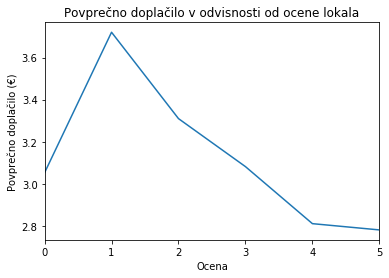

In [114]:
lokali_po_oceni.doplacilo.mean().plot(title='Povprečno doplačilo v odvisnosti od ocene lokala').set(xlabel='Ocena', ylabel='Povprečno doplačilo (€)')

Če odmislimo neocenjene lokale, vidimo, da so dobro ocenjeni lokali praviloma cenejši od slabo ocenjenih. Ob tem se zastavlja vprašanje, če nista vzrok in posledica ravno obrnjena, torej da študenti cenejše lokale ocenjujejo bolje kot dražje. Odgovor bo podan v nadaljevanju.

In [115]:
lokali['cenovni razred'] = ((lokali['doplacilo'] * 100 + 99) // 100) 

In [116]:
lokali.sort_values(['doplacilo', 'ocena'], ascending=[True, False])

,cena,doplacilo,mesto,ocena,ime,naslov,cenovni razred
id,,,,,,,
2724,2.63,0.00,LJUBLJANA,5,FAJN FUUD PIZZA,Poljanska cesta 22,0.0
2702,2.63,0.00,MARIBOR,5,FRESH 4 LIFE VETRINJSKA,Vetrinjska ulica 9,0.0
2650,2.63,0.00,MARIBOR,5,GOSPOSVETSKA,Gosposvetska cesta 83,0.0
2347,2.63,0.00,MARIBOR,5,KAVARNA IN SENDVIČARNA FERI,Smetanova ulica 17,0.0
2731,2.63,0.00,LJUBLJANA,5,MAFIJA,Jadranska 21,0.0
1984,2.63,0.00,VELENJE,5,PEK MATJAŽ TOMŠIČEVA,Tomšičeva cesta 15,0.0
1335,2.63,0.00,LJUBLJANA,5,PIZZERIA ŠESTINKA,Miklošičeva cesta 22,0.0
...,...,...,...,...,...,...,...
1432,7.00,4.37,JESENICE,2,EJGA - RESTAVRACIJA - KAVARNA - PUB - CATERING,Cesta maršala Tita 27,5.0


In [117]:
lokali_po_doplacilu = lokali.groupby('cenovni razred')

In [118]:
lokali_po_doplacilu.size()

cenovni razred
0.0     21
1.0     16
2.0     41
3.0    176
4.0    193
5.0     43
dtype: int64

[Text(0, 0.5, 'Število'), Text(0.5, 0, 'Cenovni razred')]

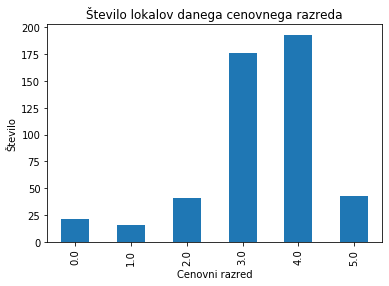

In [119]:
lokali_po_doplacilu.size().plot.bar(title='Število lokalov danega cenovnega razreda').set(xlabel='Cenovni razred', ylabel='Število')

In [120]:
len(lokali[lokali.doplacilo == 0])

21

In [121]:
len(lokali[lokali.doplacilo == 4.37])

25

Lokali so razdeljeni v skupine po cenovnih razredih, kjer so v razredu 0.0 tisti, kjer lahko jemo brez doplačila, v razredu 1.0 moramo doplačati od 0,01 € do 1,00 €, v 2.0 doplačamo od 1,01 € do 2,00 € in tako naprej do razreda 5.0, kjer doplačamo od 4,01 € do 4,37 € kar je najvišje možno doplačilo. Vidimo, da največkrat doplačamo med 2 in 4 evri. Brez doplačila lahko jemo v 21 lokalih, lokalov z najvišjim doplačilom pa je 25.

In [122]:
lokali_po_doplacilu.ocena.mean()

cenovni razred
0.0    4.333333
1.0    3.500000
2.0    3.292683
3.0    3.369318
4.0    3.233161
5.0    3.046512
Name: ocena, dtype: float64

[Text(0, 0.5, 'Povprečna ocena'), Text(0.5, 0, 'Cenovni razred')]

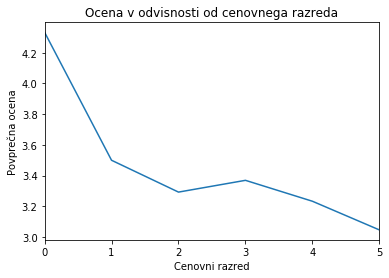

In [123]:
lokali_po_doplacilu.ocena.mean().plot(title='Ocena v odvisnosti od cenovnega razreda').set(xlabel='Cenovni razred', ylabel='Povprečna ocena')

Res se je izkazalo, da je študentom višina doplačila zelo pomemben dejavnik pri ocenjevanju lokalov. Tisti brez doplačila so ocenjeni bistveno bolje od vseh ostalih, pa tudi naprej je graf z manjšo izjemo padajoč. 

## Geografska porazdelitev lokalov

In [124]:
lokali.groupby('mesto').size().sort_values(ascending=False)

mesto
LJUBLJANA            227
MARIBOR               89
KOPER/CAPODISTRIA     23
KRANJ                 18
NOVO MESTO            15
                    ... 
POSTOJNA               1
TRZIN                  1
NAKLO                  1
ROGAŠKA SLATINA        1
KAMNIK                 1
Length: 36, dtype: int64

[Text(0, 0.5, 'Število'), Text(0.5, 0, '')]

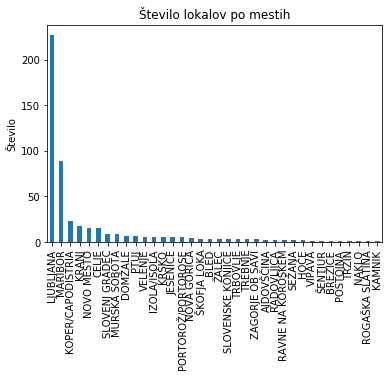

In [125]:
lokali.groupby('mesto').size().sort_values(ascending=False).plot.bar(title='Število lokalov po mestih').set(xlabel='', ylabel='Število')

V Ljubljani je daleč največ lokalov, več kot 10 jih je še v Mariboru, Kopru, Kranju, Novem mestu in Celju. Preostalih 30 mest pa združimo v skupino Druga mesta. 

In [126]:
lokali['kraj'] = [x if x in {'LJUBLJANA', 'MARIBOR', 'KRANJ', 'NOVO MESTO', 'CELJE'} else 'DRUGA MESTA' for x in lokali['mesto']]

[Text(0, 0.5, 'Število'), Text(0.5, 0, '')]

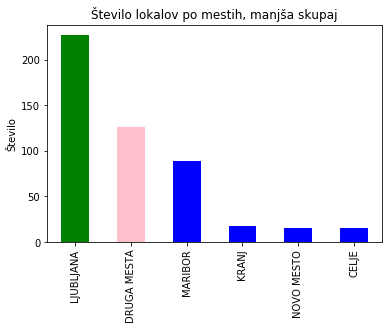

In [127]:
lokali.groupby('kraj').size().sort_values(ascending=False).plot.bar(title='Število lokalov po mestih, manjša skupaj', color=['green', 'pink', 'blue', 'blue', 'blue', 'blue']).set(xlabel='', ylabel='Število')

In [128]:
lokali.groupby('kraj').mean()

,cena,doplacilo,ocena,cenovni razred
kraj,,,,
CELJE,5.585333,2.955333,4.266667,3.333333
DRUGA MESTA,5.699444,3.069444,2.428571,3.476190
KRANJ,5.350000,2.720000,3.333333,3.166667
LJUBLJANA,5.578722,2.948722,3.581498,3.365639
MARIBOR,5.132135,2.502135,3.988764,2.842697
NOVO MESTO,5.530667,2.900667,2.133333,3.400000


[Text(0, 0.5, 'Povprečno doplačilo'), Text(0.5, 0, '')]

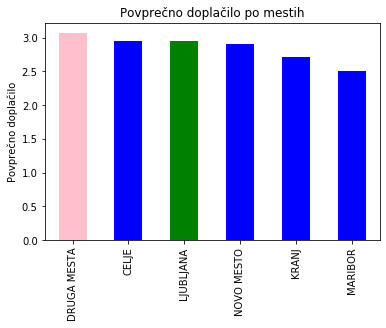

In [129]:
lokali.groupby('kraj').mean().doplacilo.sort_values(ascending=False).plot.bar(x='mesto', y='doplacilo', title='Povprečno doplačilo po mestih', color=['pink', 'blue', 'green', 'blue', 'blue', 'blue']).set(xlabel='', ylabel='Povprečno doplačilo')

[Text(0, 0.5, 'Povprečna ocena'), Text(0.5, 0, '')]

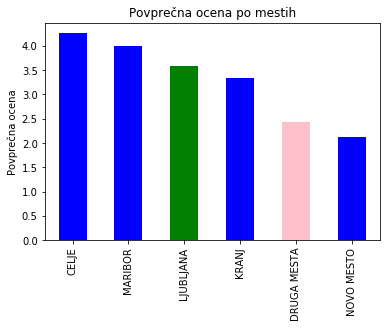

In [130]:
lokali.groupby('kraj').mean().ocena.sort_values(ascending=False).plot.bar(x='mesto', y='ocena', title='Povprečna ocena po mestih', color=['blue', 'blue', 'green', 'blue', 'pink', 'blue']).set(xlabel='', ylabel='Povprečna ocena')

Cena in ocena lokalov precej variirata po posameznih mestih. Ljubljana kot največje študijsko mesto z največ lokali v Sloveniji je pri obeh kategorijah nekje v sredini. Manjša mesta se izkažejo za najdražja in slabše ocenjena, kar je morda posledica tega, da je v manjših krajih malo fakultet in visokih šol, zato študentska ponudba pač ne more biti konkurenčna tej v mestih, v katerih se zadržuje več študentov. 

## Dodatne lastnosti ponudbe

In [131]:
lastnosti

,lastnost
id,
2605,Dostop za invalide
2605,Kosilo
2605,Odprt ob vikendih
1478,Dostop za invalide
1478,Vegetarijansko
1478,Kosilo
1478,Odprt ob vikendih
...,...
2771,Odprt ob vikendih


In [132]:
lastnosti.groupby('lastnost').size().sort_values(ascending=False)

lastnost
Kosilo                       439
Vegetarijansko               396
Odprt ob vikendih            308
Dostop za invalide           214
Solata                       116
Dostop za invalide (WC)      104
Študentske ugodnosti          66
Dostava                       53
Pizza                         48
Nov lokal                     26
Celiakiji prijazni obroki      5
Hitra hrana                    3
dtype: int64

[Text(0, 0.5, 'Število'), Text(0.5, 0, '')]

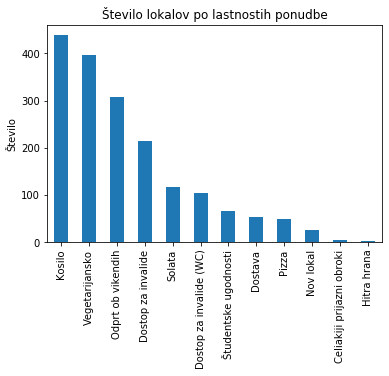

In [133]:
lastnosti.groupby('lastnost').size().sort_values(ascending=False).plot.bar(title='Število lokalov po lastnostih ponudbe').set(xlabel='', ylabel='Število')

In [134]:
pd.merge(lokali, lastnosti, left_on='id', right_on='id')

,cena,doplacilo,mesto,ocena,ime,naslov,cenovni razred,kraj,lastnost
id,,,,,,,,,
2605,5.50,2.87,LJUBLJANA,4,"&quot;SOLE&quot; OKREPČEVALNICA, PIZZERIJA, SL...",Kolodvorska ulica 18,3.0,LJUBLJANA,Dostop za invalide
2605,5.50,2.87,LJUBLJANA,4,"&quot;SOLE&quot; OKREPČEVALNICA, PIZZERIJA, SL...",Kolodvorska ulica 18,3.0,LJUBLJANA,Kosilo
2605,5.50,2.87,LJUBLJANA,4,"&quot;SOLE&quot; OKREPČEVALNICA, PIZZERIJA, SL...",Kolodvorska ulica 18,3.0,LJUBLJANA,Odprt ob vikendih
1478,6.53,3.90,LJUBLJANA,4,ABI FALAFEL,Trubarjeva cesta 40,4.0,LJUBLJANA,Dostop za invalide
1478,6.53,3.90,LJUBLJANA,4,ABI FALAFEL,Trubarjeva cesta 40,4.0,LJUBLJANA,Vegetarijansko
1478,6.53,3.90,LJUBLJANA,4,ABI FALAFEL,Trubarjeva cesta 40,4.0,LJUBLJANA,Kosilo
1478,6.53,3.90,LJUBLJANA,4,ABI FALAFEL,Trubarjeva cesta 40,4.0,LJUBLJANA,Odprt ob vikendih
...,...,...,...,...,...,...,...,...,...
2771,3.23,0.60,LJUBLJANA,4,ŽITO LJUBLJANA BAVARSKI DVOR,Slovenska cesta 58,1.0,LJUBLJANA,Odprt ob vikendih


In [135]:
pd.merge(lokali, lastnosti, left_on='id', right_on='id').groupby('lastnost').doplacilo.mean().sort_values(ascending=False)

lastnost
Dostava                      3.673585
Vegetarijansko               3.068258
Odprt ob vikendih            3.063994
Solata                       3.045259
Kosilo                       3.022642
Dostop za invalide           2.896215
Dostop za invalide (WC)      2.807404
Študentske ugodnosti         2.759697
Nov lokal                    2.578846
Celiakiji prijazni obroki    2.448000
Pizza                        1.787292
Hitra hrana                  0.956667
Name: doplacilo, dtype: float64

[Text(0, 0.5, 'Povprečno doplačilo'), Text(0.5, 0, '')]

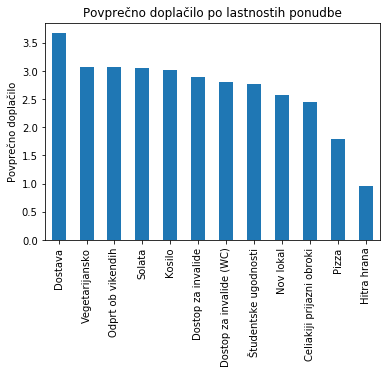

In [136]:
pd.merge(lokali, lastnosti, left_on='id', right_on='id').groupby('lastnost').doplacilo.mean().sort_values(ascending=False).plot.bar(title='Povprečno doplačilo po lastnostih ponudbe').set(xlabel='', ylabel='Povprečno doplačilo')

V povprečju so najdražji lokali tisti, ki hrano dostavijo na željeni naslov, najcenejši pa tisti, ki ponujajo pizze in hitro hrano. Rezultat se zdi smiselen. 

In [137]:
pd.merge(lokali, lastnosti, left_on='id', right_on='id').groupby('lastnost').ocena.mean().sort_values(ascending=False)

lastnost
Celiakiji prijazni obroki    4.600000
Hitra hrana                  4.000000
Študentske ugodnosti         3.621212
Odprt ob vikendih            3.577922
Pizza                        3.500000
Dostop za invalide           3.467290
Dostop za invalide (WC)      3.307692
Kosilo                       3.302961
Vegetarijansko               3.250000
Dostava                      3.226415
Solata                       3.206897
Nov lokal                    2.846154
Name: ocena, dtype: float64

[Text(0, 0.5, 'Povprečna ocena'), Text(0.5, 0, '')]

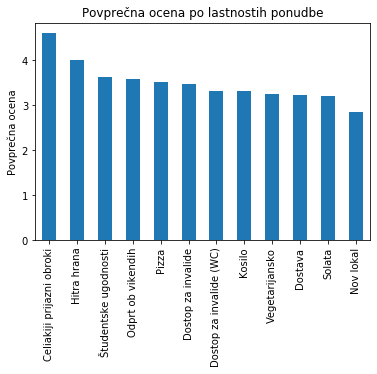

In [138]:
pd.merge(lokali, lastnosti, left_on='id', right_on='id').groupby('lastnost').ocena.mean().sort_values(ascending=False).plot.bar(title='Povprečna ocena po lastnostih ponudbe').set(xlabel='', ylabel='Povprečna ocena')

Ocena lokala je malo odvisna od dodatnih lastnosti ponudbe le-tega. Nekoliko izstopa le ocena lokalov s celiakiji prijaznimi obroki, s hitro hrano in ocena novih lokalov, vendar je to očitna posledica majhne zastopanosti teh treh lastnosti ponudbe. Iz diagrama Število lokalov po lastnostih ponudbe je namreč vidno, da so to zadnje tri lastnosti po zastopanosti, torej je prisotna večja statistična napaka.

## Zaključek 
Ponudba študentske prehrane je v največjem študijskem mestu, Ljubljani, velika, po ostalih mestih pa manjša. Lokali ponujajo različne možnosti. Ob analizi dejavnikov, kaj vpliva na oceno, ki jo študenti dodelijo posameznim lokalom, pa lahko zaključimo, da je edini pomemben dejavnik cena obroka. Cenejši lokali so ocenjeni bistveno bolje od dražjih. To kaže, da so študentski boni za študente zares pomembni in ohranjajo svoj prvotni namen, študentom v kraju študija omogočiti raznoliko in kvalitetno prehrano po njim dostopni ceni. 